<a href="https://colab.research.google.com/github/dsogden/Quantitative_Finance/blob/main/Estimating_covariance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import covariance

In [2]:
X = np.random.normal(size=1000)
epsilon = np.random.normal(0, 3, size=X.shape[0])
Y = 5 * X + epsilon

product = (X - np.mean(X)) * (Y - np.mean(Y))
expected_value = np.mean(product)
print(f'Value of the covariance between X and Y: {expected_value}')

Value of the covariance between X and Y: 4.786523207103934


In [4]:
np.cov([X, Y])

array([[ 0.9662379 ,  4.79131452],
       [ 4.79131452, 32.44969272]])

In [5]:
print(np.var(X), np.var(Y))

0.9652716576595504 32.41724302871572


In [14]:
from statsmodels import regression
import statsmodels.api as sm

def linreg(X, y):
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(y, X).fit()
    a = model.params[0]
    b = model.params[1]

    X2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    yhat = X2 * b + a

    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 1], y, alpha=0.3, label='Scatter Plot')
    plt.plot(X2, yhat, 'r', alpha=0.9, label='Linear Equation')
    plt.xlabel('X Value')
    plt.ylabel('y Value')
    plt.xlim([-4, 4])
    plt.ylim([-30, 30])
    plt.legend()
    plt.show()

    return model.summary()

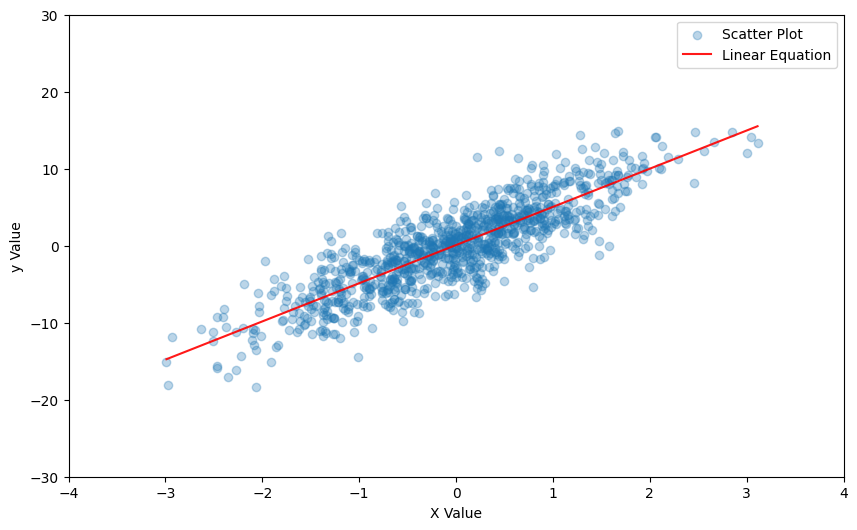

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     2728.
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          9.28e-288
Time:                        15:08:43   Log-Likelihood:                -2499.6
No. Observations:                1000   AIC:                             5003.
Df Residuals:                     998   BIC:                             5013.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0850      0.093      0.911      0.362      -0.098       0.268
x1             4.9587      0.095     52.233      0.000       4.772       5.145
==============================================================================
Omnibus:                        1.029   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.598   Jarque-Bera (JB):                0.906
Skew:                          -0.021   Prob(JB):                        0.636
Kurtosis:                       3.142   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
linreg(X, Y)

## The Covariance Matrix

In [16]:
import yfinance as yf

start_date = '2016-01-01'
end_date = '2016-02-02'

tickers = ['SBUX', 'AAPL', 'GS', 'GILD']
returns = yf.download(tickers, start=start_date, end=end_date)['Adj Close'].pct_change()[1:]
returns.columns = tickers

[*********************100%%**********************]  4 of 4 completed


In [18]:
print('Covariance Matrix')
print(f'{returns.cov()}')

Covariance Matrix
          SBUX      AAPL        GS      GILD
SBUX  0.000755  0.000243  0.000467  0.000336
AAPL  0.000243  0.000544  0.000133  0.000078
GS    0.000467  0.000133  0.000539  0.000339
GILD  0.000336  0.000078  0.000339  0.000451


## Ledoit-Wolf Estimator

In [19]:
start = '2016-01-01'
end = '2016-02-02'

symbols = ['AAPL', 'MSFT', 'BRK-A', 'GE', 'FDX', 'SBUX']
returns = yf.download(symbols, start=start_date, end=end_date)['Adj Close'].pct_change()[1:]
returns.columns = symbols
returns.head(10)

[*********************100%%**********************]  6 of 6 completed


,AAPL,MSFT,BRK-A,GE,FDX,SBUX
Date,,,,,,
2016-01-05,-0.025059,0.003592,0.008506,0.000977,0.004562,0.006694
2016-01-06,-0.019570,0.002107,-0.026824,-0.015940,-0.018165,-0.008866
2016-01-07,-0.042204,-0.009295,-0.043901,-0.042314,-0.034783,-0.024772
2016-01-08,0.005288,-0.008590,0.000891,-0.017950,0.003067,-0.001058
2016-01-11,0.016192,-0.004332,-0.012917,0.004570,-0.000573,0.021014
2016-01-12,0.014513,0.004869,0.013086,0.002099,0.009178,0.028364
2016-01-13,-0.025710,-0.018041,-0.032811,-0.013967,-0.021599,-0.026741
2016-01-14,0.021871,0.009186,0.010822,0.029037,0.028466,0.019181
2016-01-15,-0.024015,-0.011704,-0.036294,-0.019614,-0.039917,-0.016616


In [20]:
in_sample_lw = covariance.ledoit_wolf(returns)[0]
print(in_sample_lw)

[[0.00066817 0.00014688 0.00028379 0.00020439 0.00041892 0.00026355]
 [0.00014688 0.00020802 0.00017614 0.00012175 0.00016543 0.00015163]
 [0.00028379 0.00017614 0.00046564 0.00021761 0.00034152 0.00024725]
 [0.00020439 0.00012175 0.00021761 0.00033818 0.00023609 0.00023581]
 [0.00041892 0.00016543 0.00034152 0.00023609 0.00051636 0.00022846]
 [0.00026355 0.00015163 0.00024725 0.00023581 0.00022846 0.00042872]]


In [21]:
oos_start = '2016-02-01'
oos_end = '2016-03-02'

oos_returns = yf.download(symbols, start=oos_start, end=oos_end)['Adj Close'].pct_change()[1:]
oos_returns.columns = symbols
oos_returns.head(10)

[*********************100%%**********************]  6 of 6 completed


,AAPL,MSFT,BRK-A,GE,FDX,SBUX
Date,,,,,,
2016-02-02,-0.020222,-0.024939,-0.016325,-0.013966,-0.031256,-0.008170
2016-02-03,0.019793,-0.000216,0.006377,0.015227,-0.015849,-0.019275
2016-02-04,0.008035,0.012320,0.024661,0.017789,-0.003068,-0.020830
2016-02-05,-0.026708,-0.007180,-0.017138,-0.021933,-0.035385,-0.065191
2016-02-08,0.010530,0.002280,-0.011978,-0.012964,-0.014952,-0.006423
2016-02-09,-0.000210,0.007215,-0.004297,0.003905,-0.002631,0.005172
2016-02-10,-0.007580,-0.010979,-0.016414,0.000707,0.008726,0.013230
2016-02-11,-0.006047,-0.002729,-0.025227,-0.030035,-0.000402,-0.003990
2016-02-12,0.003095,0.021047,0.033596,0.029508,0.016301,0.017116


In [28]:
oos_lw = covariance.ledoit_wolf(oos_returns)[0]
lw_errors = np.sum(abs(in_sample_lw - oos_lw), axis=1)
print(np.mean(lw_errors))

0.0005625851957187532


In [32]:
errors = np.sum(abs(returns.cov().values - oos_returns.cov().values), axis=1)
sample_errors = np.mean(errors)
print(f'Average sample covariance error: {sample_errors}')

Average sample covariance error: 0.0006756479176173363


In [33]:
print(f'Error improvement of LW over sample: {(np.mean(sample_errors/lw_errors)-1)*100:0.2f}')

Error improvement of LW over sample: 37.59


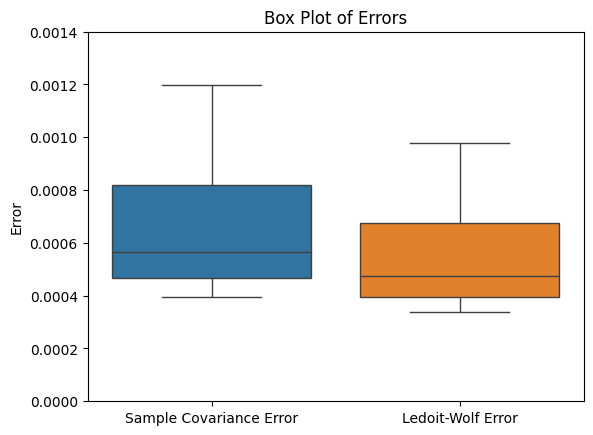

In [40]:
sns.boxplot(
    data=pd.DataFrame({
        'Sample Covariance Error': errors,
        'Ledoit-Wolf Error': lw_errors
    })
)
plt.title('Box Plot of Errors')
plt.ylabel('Error')
plt.ylim([0, 0.0014])
plt.show()

### Adding more assets

In [42]:
start_date = '2016-01-01'
end_date = '2017-06-01'

symbols = [
    'SPY', 'XLF', 'XLE', 'XLU','XLK', 'XLI', 'XLB', 'GE', 'GS', 'BRK-A', 'JPM', 'AAPL', 'MMM', 'BA',
    'CSCO','KO', 'DIS','DD', 'XOM', 'INTC', 'IBM', 'NKE', 'MSFT', 'PG', 'HD', 'MCD', 'CVX',
    'AXP','JNJ', 'MRK', 'CAT', 'PFE', 'TRV', 'UNH', 'WMT', 'VZ', 'QQQ', 'BAC', 'F', 'C', 'CMCSA',
    'MS', 'ORCL', 'PEP', 'HON', 'GILD', 'LMT', 'UPS', 'HP', 'FDX', 'GD', 'SBUX'
]

returns = yf.download(symbols, start=oos_start, end=oos_end)['Adj Close'].pct_change()[1:]
returns.columns = symbols

[*********************100%%**********************]  52 of 52 completed


In [43]:
dates = returns.resample('M').first().index

sample_covs = []
lw_covs = []

for i in range(1, len(dates)):
    sample_cov = returns[dates[i-1]:dates[i]].cov().values
    sample_covs.append(sample_cov)

    lw_cov = covariance.ledoit_wolf(returns[dates[i-1]:dates[i]])[0]
    lw_covs.append(lw_cov)